In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
with open('xeb_results.json', 'r') as f:
    xeb = json.load(f)

In [3]:
id = xeb[0]
real = xeb[1]
imag = xeb[2]
amplitudes = np.array(real) + 1j*np.array(imag)
probs = np.abs(amplitudes)**2
n = 64

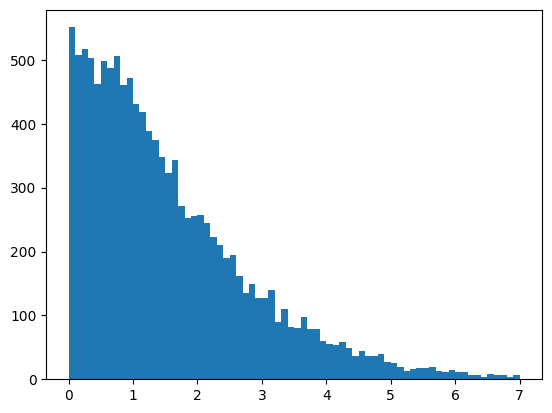

In [4]:
normalized = 2**n * probs
plt.hist(normalized, bins=np.arange(0, 7.001, 0.1));

# Regular XEB socore usable for restricted adversary analysis

In [5]:
xeb_score = np.sum(probs) * 2**n / 11961 - 1 # 11961 is the total number of samples including the ones that failed and do not contribute to xeb. Total 11933 samples succeeded
print(xeb_score)

0.5859285966281542


# Truncated XEB score usable for oracle adversary analysis

In [6]:
def solve_xmin(ds):
    results = []
    for d in ds:
        x = np.linspace(0, 0.1, 101)
        cdf = 1 - np.exp(-x) * (1+x)
        id = np.argmin(np.abs(cdf-d))
        results.append(x[id])
    return np.array(results)

In [7]:
original_score = np.mean(normalized) - 1

xmax = 2
clipped = np.clip(normalized, 0, xmax)
clipped_score = np.mean(clipped) - 1
print(clipped_score)

0.2143200236620766
